In [27]:
import pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np
import math
%matplotlib inline
dataQ21 = pd.read_csv('data/figQ21.dat', index_col=False)
dataQ22 = pd.read_csv('data/figQ22.dat', index_col=False)
dataThIQ = pd.read_csv('data/figThIQ.dat', index_col=False)
data_israel = pd.read_csv('data/fig2_israel.dat', index_col=False); data_israel.X = -data_israel.X

In [18]:
def make_plot_double_ratio(data , name 
                           , title='' , xlabel='' , ylabel='' 
                           , xmin = 1 , xmax = 180 , ymin = 0.65 , ymax = 1.3
                           , DoPlotRatioToHA = False ):
    data = data[(data.bin!=0) | (data.Setup=='kin2')| (data.Setup=='kin4')]
    x = data.X
    xerr = data.dX
    xList = [data.X[data.Setup=='kin1'],data.X[data.Setup=='kin2'],data.X[data.Setup=='kin3'],data.X[data.Setup=='kin4']]
    xerrList = [data.dX[data.Setup=='kin1'],data.dX[data.Setup=='kin2'],data.dX[data.Setup=='kin3'],data.dX[data.Setup=='kin4']]
    y = data.R3D / data.H
    yerr = -data.dR3D / data.H
    yList = [data.R3D[data.Setup=='kin1']/data.H[data.Setup=='kin1'],
             data.R3D[data.Setup=='kin2']/data.H[data.Setup=='kin2'],
             data.R3D[data.Setup=='kin3']/data.H[data.Setup=='kin3'],
             data.R3D[data.Setup=='kin4']/data.H[data.Setup=='kin4']]
    yerrList = [-data.dR3D[data.Setup=='kin1']/data.H[data.Setup=='kin1'],
             -data.dR3D[data.Setup=='kin2']/data.H[data.Setup=='kin2'],
             -data.dR3D[data.Setup=='kin3']/data.H[data.Setup=='kin3'],
             -data.dR3D[data.Setup=='kin4']/data.H[data.Setup=='kin4']]
    xArenhovel = x
    yArehnovel = data.M7 / data.H
    yHAList = [data.M7[data.Setup=='kin1']/data.H[data.Setup=='kin1'],
             data.M7[data.Setup=='kin2']/data.H[data.Setup=='kin2'],
             data.M7[data.Setup=='kin3']/data.H[data.Setup=='kin3'],
             data.M7[data.Setup=='kin4']/data.H[data.Setup=='kin4']]
    yHAerrList = [-data.M7[data.Setup=='kin1']/data.H[data.Setup=='kin1'],
             -data.M7[data.Setup=='kin2']/data.H[data.Setup=='kin2'],
             -data.M7[data.Setup=='kin3']/data.H[data.Setup=='kin3'],
             -data.M7[data.Setup=='kin4']/data.H[data.Setup=='kin4']]
    fig = plt.figure(figsize=(12,8))
    colorList = ['black','black','black','black']
    markerList= ['v','s','^','o']
    labels    = ['setup-A','setup-B','setup-C','setup-D']
    for i in range(len(xList)):
        plt.scatter(xList[i], yList[i], color = colorList[i],
                    marker= markerList[i],
                    label=labels[i],
                    s=100)
        plt.errorbar(xList[i], yList[i], 
                     xerr=[xerrList[i],xerrList[i]], yerr=[yerrList[i],yerrList[i]],
                     color = colorList[i],
                     marker= markerList[i],
                     linestyle = 'none',
                    markersize=12)
    plt.title(title,fontsize=25)    
    plt.xlabel(xlabel,fontsize=25)
    plt.ylabel(ylabel,fontsize=25)
    ax = fig.add_subplot(111)
    ax.grid(True,linestyle='-',color='0.75')
    ax.text( xmin+(xmax-xmin)/3., ymin+(ymax-ymin)/3. , "preliminary" , fontsize=40 , color='red' , alpha = 0.15 )
    matplotlib.pyplot.axhspan(ymin=1, ymax=1, xmin=0, xmax=1,linestyle='--',linewidth=2)
    plt.scatter(xArenhovel , yArehnovel, marker=[6,2,0], color='r',label='Calculations',s=200)
    ax.legend(scatterpoints=1)
    plt.ylim(ymin,ymax)
    plt.xlim(xmin,xmax)
#     ax.xaxis.set_ticks(np.arange(xmin*0.95,xmax*1.05, 20))
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.savefig("/Users/erezcohen/Desktop/"+name+".pdf")
    
    if DoPlotRatioToHA:
        fig = plt.figure(figsize=(12,8))
        for i in range(len(xList)):
            y_ratio = yList[i]/yHAList[i]
            y_ratio_err = yerrList[i]/yHAList[i]
            plt.scatter(xList[i], y_ratio, color = colorList[i],
                         marker= markerList[i],
                         label=labels[i],
                        s=100)
            plt.errorbar(xList[i], y_ratio, 
                         xerr=[xerrList[i],xerrList[i]], yerr=[y_ratio_err,y_ratio_err],
                         color = colorList[i],
                         marker= markerList[i],
                         linestyle = 'none',
                        markersize=12)
        plt.xlabel(xlabel,fontsize=22)
        plt.ylabel( r'$\frac{data}{HA-calculation}$',fontsize=25)
        ax = fig.add_subplot(111)
        ax.grid(True,linestyle='-',color='0.75')
        matplotlib.pyplot.axhspan(ymin=1, ymax=1, xmin=0, xmax=1,linestyle='-',linewidth=40,color='#d3d3d3')
        matplotlib.pyplot.axhspan(ymin=1, ymax=1, xmin=0, xmax=1,linestyle='--',linewidth=2,color='black')
        ax.text( xmin+(xmax-xmin)/3., 1.2 , "preliminary" , fontsize=40 , color='red' , alpha = 0.15 )
        plt.xlim(xmin,xmax)
        ax.legend(scatterpoints=1)
        plt.tick_params(axis='both', which='major', labelsize=20)
        plt.savefig("/Users/erezcohen/Desktop/"+name+"_ratio_to_HA.pdf")

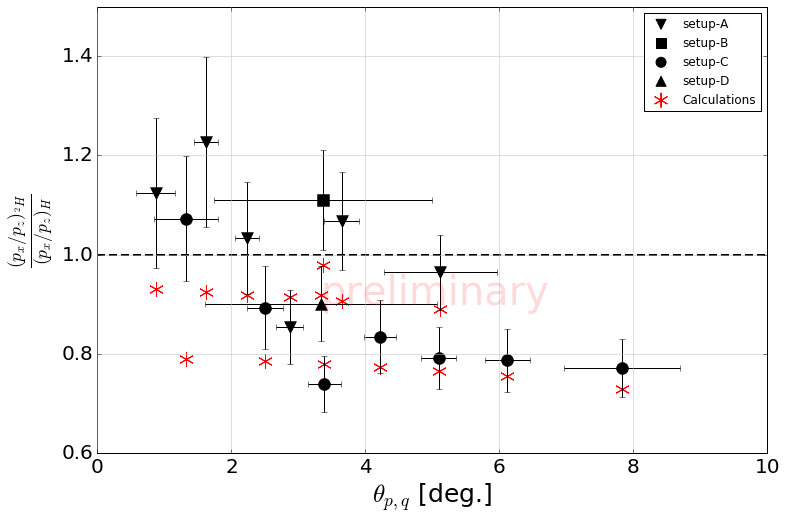

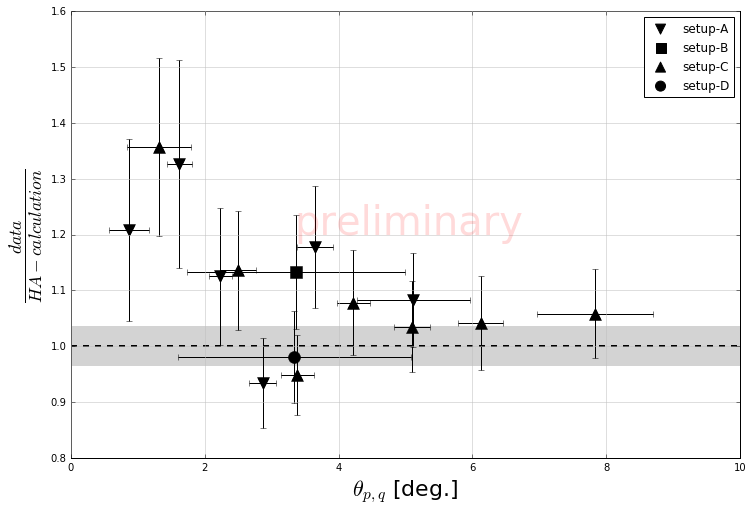

In [4]:
make_plot_double_ratio( dataQ22 , "theta_pq" ,
                       '' ,'$\\theta_{p,q}$ [deg.]' ,  r'$\frac{(p_{x}/p_{z})_{^{2}H}}{(p_{x}/p_{z})_{H}}$' , 
                       0 , 10 , 0.6 , 1.5 , 
                       True )

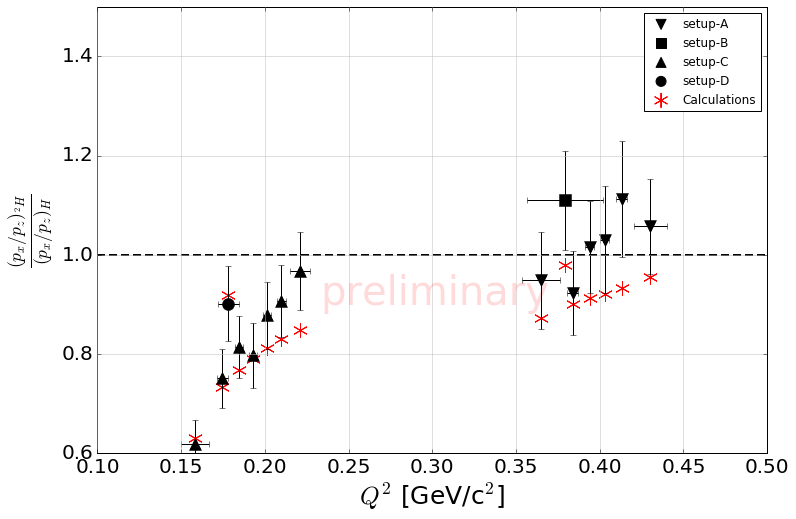

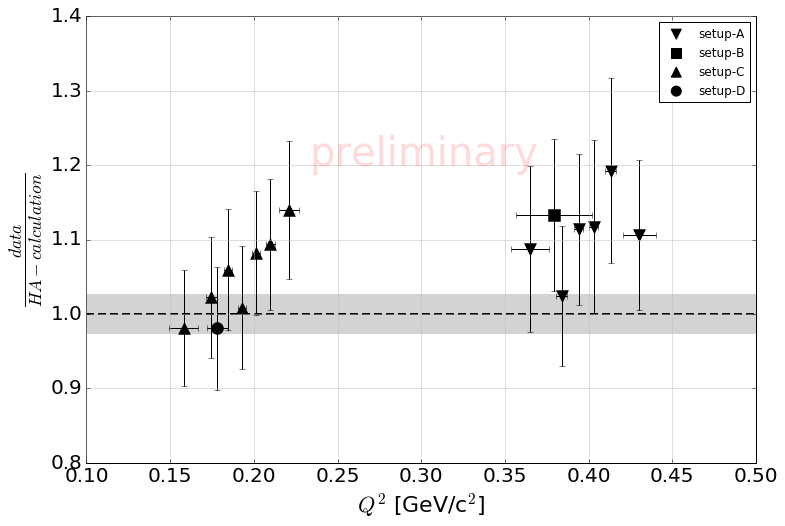

In [19]:
make_plot_double_ratio( dataQ21 , "Q2" ,
                       '' ,'$Q^{2}$ [GeV/c$^{2}$]' ,  r'$\frac{(p_{x}/p_{z})_{^{2}H}}{(p_{x}/p_{z})_{H}}$' ,
                       0.1 , 0.5 , 0.6 , 1.5 , 
                       True )

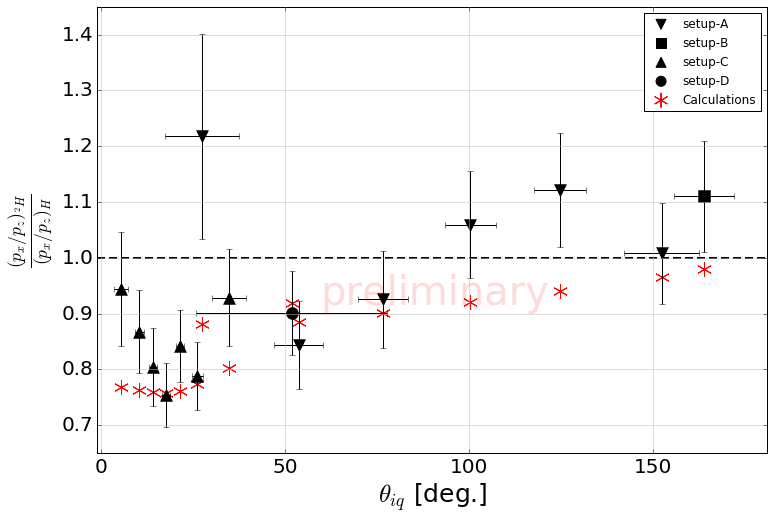

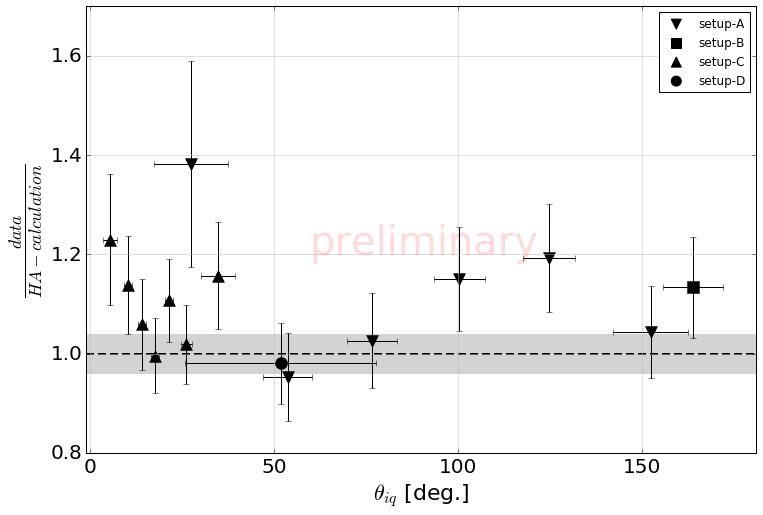

In [20]:
make_plot_double_ratio( dataThIQ , "theta_iq" ,
                       '' ,'$\\theta_{iq}$ [deg.]' ,  r'$\frac{(p_{x}/p_{z})_{^{2}H}}{(p_{x}/p_{z})_{H}}$' , 
                       -1 , 181 , .65, 1.45 ,
                       True )

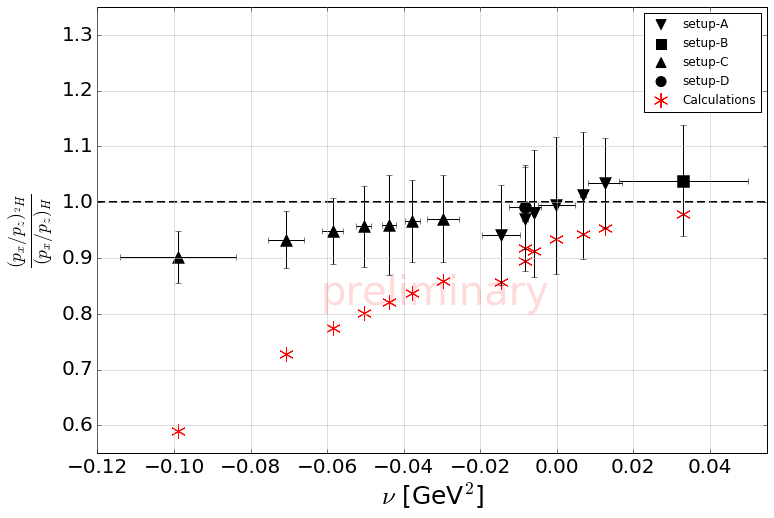

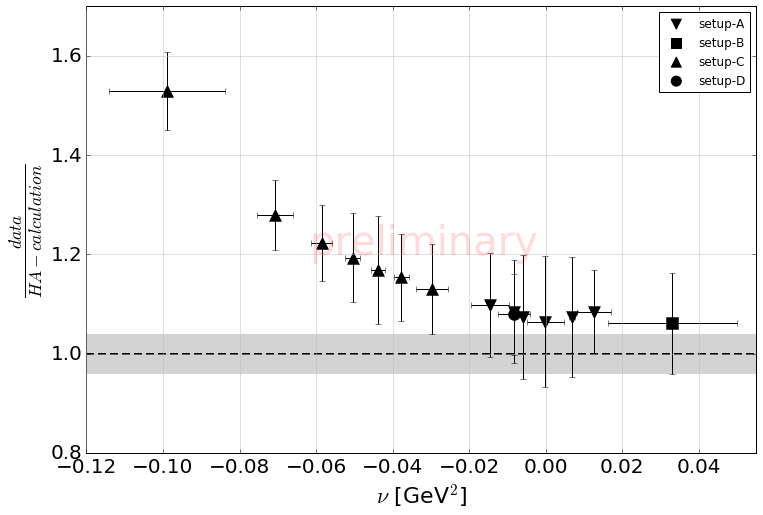

In [30]:
make_plot_double_ratio( data_israel , "nuBoosted" ,
                       '' ,'$\\nu$ [GeV$^{2}$]' ,  r'$\frac{(p_{x}/p_{z})_{^{2}H}}{(p_{x}/p_{z})_{H}}$' , 
                       -0.12,0.055 , .55, 1.35 ,
                       True )

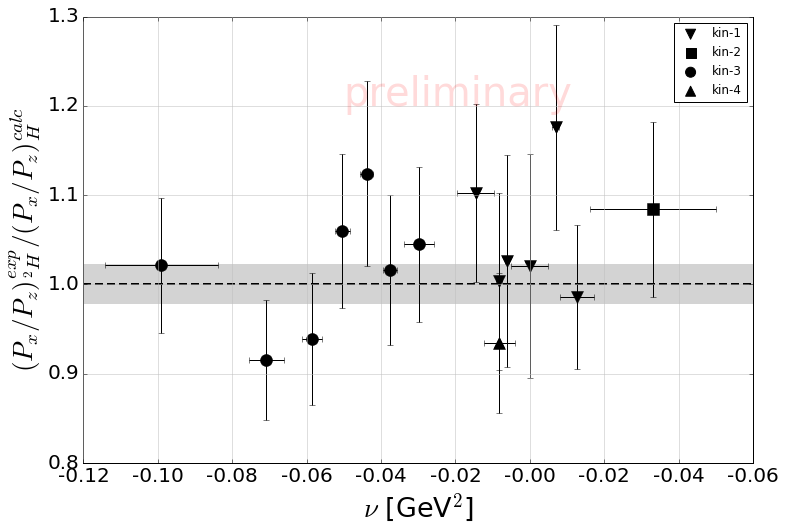

In [78]:
fig = plt.figure(figsize=(12,8))
colorList = ['black','black','black','black']
markerList= ['v','s','o','^']
for i in range(len(xList)):
    y_ratio = yList[i]/yHAList[i]
    y_ratio_err = yerrList[i]/yHAList[i]
    plt.scatter(-xList[i], y_ratio, color = colorList[i],
                 marker= markerList[i],
                 label='kin-%d'%(i+1),
                s=100)
    plt.errorbar(-xList[i], y_ratio, 
                 xerr=[xerrList[i],xerrList[i]], yerr=[y_ratio_err,y_ratio_err],
                 color = colorList[i],
                 marker= markerList[i],
                 linestyle = 'none',                 
                 markersize=12)
ax = fig.add_subplot(111)
ax.text( -0.05, 1.2 , "preliminary" , fontsize=40 , color='red' , alpha = 0.15 )
ax.grid(True,linestyle='-',color='0.75')
matplotlib.pyplot.axhspan(ymin=1, ymax=1, xmin=0, xmax=1,linestyle='-',linewidth=40,color='#d3d3d3')
matplotlib.pyplot.axhspan(ymin=1, ymax=1, xmin=0, xmax=1,linestyle='--',linewidth=2,color='black')
ax.legend(scatterpoints=1)
# cosmetics...
plt.xlabel('$\\nu$ [GeV$^{2}$]',fontsize=27)
plt.ylabel( r'$(P_{x}/P_{z})^{exp}_{^{2}H} / (P_{x}/P_{z})^{calc}_{H}$',fontsize=27)
plt.ylim(.8, 1.3)
plt.xlim(-0.12,0.055)
plt.tick_params(axis='both', which='major', labelsize=20)
xx, locs = plt.xticks()
ll = ['-%.2f' % math.fabs(a) for a in xx]
plt.xticks(xx, ll)
plt.savefig("/Users/erezcohen/Desktop/nu_israel_ratio_to_HA.pdf")